# HOUSING DATA REGRESSION MODEL.

* ####  Author: Brian Kipruto Ngeny. 
* ####  Student pace: Full time
* ####  Scheduled project review date/time: 09/07/2023 23:59:59
* ####  Instructor name: Veronica Isiaho
* ####  Blog post URL: 


***

## 1. Business Understanding.
> ### Introduction.
Housing projects consist of several different factors that determine the quality of the final product which is a house. Housing project can be managed by a real estate agency which is a business that arranges the selling, renting, or management of homes, land, and buildings for their owners. A real estate agency is a key player in the housing market, attracting both local and international investors who seek to capitalize on the lucrative opportunities presented by real property. With the advent of technology and availability of vast amounts of data, investors are increasingly turning to quantitative ananlysis and machine learning techniques to determine the factors that affect the sale price of houses in the real estate industry.

> This project aims to determine the specific factors that increase or decrease the sale price of a housing unit by using a range of specific factors within the data provided. The target partners include; real estate agencies, construction companies, home owners who are interested in selling and potential home owners looking to buy. By determining the factors that affect the sale price of a house, I hope to provide them with valuable insights that can inform their investment decisions and enable them to optimize their investment returns. 

> ### Problem statement
Historical housing data exists in enormous quantities, but it is mostly comprised of reports compiled after the house has been sold. This makes it hard to deduce the specific factors that affected the sale price of the houses. Determining which factors have the most significant effect on the final selling price of a house is crucial in making informed decissions about whether to invest in specific aspects such as renovations, expansions or even the housing unit as a whole.

> To address this issue, I aim to use statistical ananlysis to identify the specific factors that affect the sale price of a house. By doing so, I hope to provide an accurate linear regression model that helps real estate agencies, construction companies, home owners who are interested in selling and potential home owners looking to buy make informed decissions. This research will lead to a better understanding of the housing industry and increase returns on investments.

> ### Objectives
My aim is to:
> * Perform a statistical analysis of the data provided to determine the specific factors that affect the final selling price of a house.
> * Formulate an accurate linear regression model that helps stakeholders make informed decissions before investing in houses.
> * Provide recommendations based on the regression model.


## 2. Data Understanding

#### I) Importing libraries and loading data.

In [68]:
import pandas as pd
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import statsmodels.api as sm

data = pd.read_csv('data/kc_house_data.csv')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [69]:
# information about the data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

#### II) Data description.
The King County dataset contains 21597 rows and 21 columns with the following information:

|No.| Column    | Description|
|---| ---       | ---         |
|1|id|Unique identifier for a house|
|2|date|Date the house was sold|
|3|price|sale price of the house|
|4|bedrooms|number of bedrooms|
|5|bathrooms|number of bathrooms|
|6|sqft_living|square feet of the living area|
|7|sqft_lot|square feet of the lot|
|8|floors|number of floors|
|9|waterfront|whether the house is on a waterfront|
|10|view|view from the house|
|11|condition|general condition of the house|
|12|grade|overall grade of the house|
|13|sqft_above|square feet of the house above the basement|
|14|sqft_basement|square feet of the basement|
|15|yr_buit|the year it was built|
|16|yr_renovated|the year it was renovated|
|17|zipcode|area zipcode|
|18|lat|latitude coordinates|
|19|long|longitude coordinates|
|20|sqft_living15|square feet of the living area for 15 neighbouring houses|
|21|sqft_lot15|square feet of the land lots for 15 neighbouring houses|

The next step is to check the value count on some columns to determine if they can be useful. 

In [70]:
# check the value count for waterfront column
data['waterfront'].value_counts()

waterfront
NO     19075
YES      146
Name: count, dtype: int64

This column provides two useful categories that will be helpful in determining the effect of a waterfront on the price of a house. 

In [71]:
# check the value count for view column
data['view'].value_counts()

view
NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: count, dtype: int64

The 'view' column will be useful as it provides categories that help in determining the avarage price of houses with different views.  

In [72]:
# check the value counts for condition column
data['condition'].value_counts()

condition
Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: count, dtype: int64

This column consists of 5 unique categories which will be helpful in determining the effect of the house condition on its price.

In [73]:
# check the value counts for grade column
data['grade'].value_counts()

grade
7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: count, dtype: int64

This column has 10 distinct categories which will be helpful in determining the effect of the grade on the final price of a house.

In [74]:
# check the value counts for the yr_renovated column
data['yr_renovated'].value_counts()

yr_renovated
0.0       17011
2014.0       73
2013.0       31
2003.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1946.0        1
1976.0        1
1948.0        1
Name: count, Length: 70, dtype: int64

This column contains 70 different values with a majority of the houses having the value 0.0 which means that they have never been renovated or that the renovation year is unknown. This column will be dropped.

In [75]:
# check the value counts for zipcode column
data['zipcode'].value_counts()

zipcode
98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: count, Length: 70, dtype: int64

The zipcode column consists of 70 different zipcodes and thus, may not provide any insight into the effect on the price of the houses.

Out of the 21 columns in the dataset, only 10 columns are useful to the process. The columns that will be dropped are date, sqft_above, sqft_basement, yr_renovated, zipcode, lat, long, sqft_living 15 and sqft_lot15. These columns will be dropped because some of them e.g sqft_above and sqft_basement have almost the same data as sqft_living and sqft_lot. The date, zipcode, lat and long have litle to no bearing at all on the sale price of the houses.  

### Data cleaning
The next step is to clean the data by going through the following steps so as to end up with a complete data set that can then be used in the modelling process of the regression model. The data cleaning steps are;
* Dropping the columns we don't need.
* Identifying any missing values and dropping the rows with missing values. This is the best solution for dealing with missing values because the rows with missing values are few and are not likely to affect the outcome of the model.
* Checking for duplicated records and dropping the duplicates.

In [76]:
# dropping the columns we do not need
data = data.drop(['date', 'sqft_above', 'sqft_basement', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], axis=1)
data

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1987
...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,2009
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2014
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,2009
21595,291310100,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,Average,8 Good,2004


In [77]:
# Identifying missing values
data.isna().sum()

id                0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
view             63
condition         0
grade             0
yr_built          0
dtype: int64

There are missing values in the waterfront and view columns. we can drop these rows with missing values to remain with a completly filled dataset. 

In [78]:
# dropping rows with missing values
data = data.dropna(axis=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19164 entries, 1 to 21596
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           19164 non-null  int64  
 1   price        19164 non-null  float64
 2   bedrooms     19164 non-null  int64  
 3   bathrooms    19164 non-null  float64
 4   sqft_living  19164 non-null  int64  
 5   sqft_lot     19164 non-null  int64  
 6   floors       19164 non-null  float64
 7   waterfront   19164 non-null  object 
 8   view         19164 non-null  object 
 9   condition    19164 non-null  object 
 10  grade        19164 non-null  object 
 11  yr_built     19164 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 1.9+ MB


In [79]:
# check for duplicate records
data.duplicated().sum()

2

In [80]:
# drop the duplicated records
data.drop_duplicates(inplace=True)
data.shape

C:\Users\e-Gov\AppData\Local\Temp\ipykernel_7888\3232405597.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(inplace=True)


(19162, 12)

## 3. Data Preparation.

The target variable in this project is the selling price of the houses. Before I can come up with a regression model detailing the specific metric that affect my target varible, I am first going to perform multiple statistical analysis on the dataset.

#### a) Statistical distribution of price data.
I first check to see if the selling price data is normally distibuted and then plot a distribution curve. 

In [81]:
# check if the data is normally distributed
st.normaltest(data['price'])

NormaltestResult(statistic=17130.031264029698, pvalue=0.0)

Text(0.5, 1.0, 'Price & the number of houses')

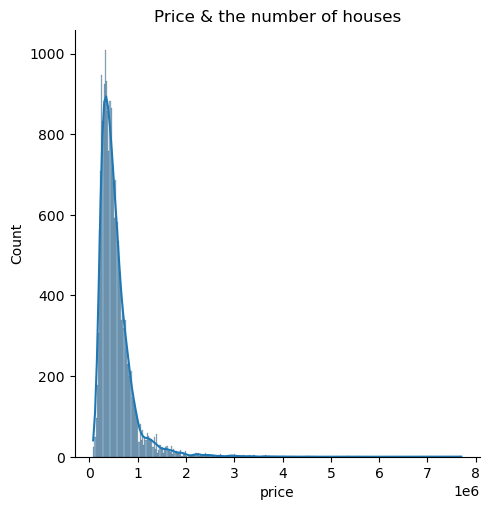

In [82]:
# plot a distribution plot for the prices 
sns.displot(data['price'], kde=True)
plt.title('Price & the number of houses')

The results of the normal distribution test coupled with the distribution curve above clearly indicate that the data is not normally distributed.

#### b) Skewness and Kurtosis.
Since I have determined that the price data is not symmetrical, I am going to measure the skewness and kurtosis of the data in order to determine the degree of distortion and the length of the tails in the distribution.

In [83]:
# check the skewness and kurtosis of the prices
print('Skewness:', st.skew(data['price']))
print('Kurtosis:', st.kurtosis(data['price']))

Skewness: 4.080591340650405
Kurtosis: 35.28787799683734


The data on the selling price of the houses has a high positive skew, meaning that there is a long tail in the higher price range. The data also happens to be leptokurtic, meaning that the data has heavy tails and that there are more outliers.

#### c) Central limit theorem.
The next statistical analysis metric is the central limit theory.This metric tests the distribution of sample means for the selling price data and creates a distribution plot to determine whether these data obeys the central limit theorem.  

In [84]:
# sampling function that takes in 2 variables
def sampler(data, n):
    sample = []
    while len(sample) != n:
        s = np.random.choice(data)
        sample.append(s)
    return sample

# test the function
test = sampler(data['price'], 1000)
test[:10]

[683500.0,
 375000.0,
 965000.0,
 335000.0,
 1000000.0,
 341000.0,
 135000.0,
 1080000.0,
 287500.0,
 800000.0]

In [85]:
#  sample mean function that takes in a sample and returns the mean
def sample_mean(sample):
    m = sum(sample)/len(sample)
    return m

# testing the function
mean_test = sample_mean(test)
mean_test

544468.732

In [86]:
# sample mean distribution function that takes in 3 variables and returns a distribution of sample means
def sample_mean_distribution(data, dist_size, n):
    mean_dist = []
    while len(mean_dist) != dist_size:
        sample = sampler(data, n)
        sampled_means = sample_mean(sample)
        mean_dist.append(sampled_means)
    return mean_dist

# testing the function
dist_test = sample_mean_distribution(data['price'], 10, 10000)
dist_test

[545600.7385,
 543055.7334,
 535890.9672,
 538961.413,
 544050.0568,
 538186.2439,
 534959.1592,
 535854.3993,
 538055.8162,
 541327.2315]

Text(0.5, 1.0, 'Sample mean distribution')

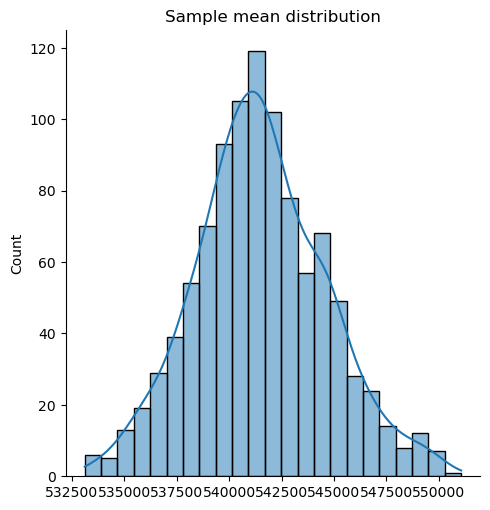

In [87]:
# visualize sample mean distribution for price data with distribution size of 1,000 samples and sample sizes of 15,000 houses
sns.displot(sample_mean_distribution(data['price'], 1000, 15000), kde=True)
plt.title('Sample mean distribution')

The data obeys the central limit theorem as potrayed by the distribution plot above. This is an indication that this dataset is statistically significant and can be used as inference about other housing datasets.

#### d) Hypothesis testing.
I will use hypothesis testing to determine the effect of a waterfront on the price of a house. The analysis done on the waterfront column of the dataset shows that it is comprised of two categorical variables, YES and No.

> __Null Hypothesis__<br>
> H0 = The presence of a waterfront has no effect on the price of a house.

> __Alternative Hypothesis__<br>
> H1 = The presence of a water front has an effect on the price of a house.

I am going to test this hypothesis using a two sample t-test in order to obtain a p-value that I will compare to an alpha value of 0.05.

In [88]:
# create two variables to be used in the t test for waterfront
yes_waterfront = data[data['waterfront'] == 'YES']
no_waterfront = data[data['waterfront'] == 'NO']

t_test_result = st.ttest_ind(yes_waterfront['price'], no_waterfront['price'])
t_test_result

Ttest_indResult(statistic=38.96734884626239, pvalue=0.0)

The p-value(0.0) is less than the alpha value(0.05) and so I can reject the null hypothesis and conclude that the presence of a waterfront has an effect on the selling price of a house.

#### e) View, condition and grade of houses.

Text(0, 0.5, 'Price')

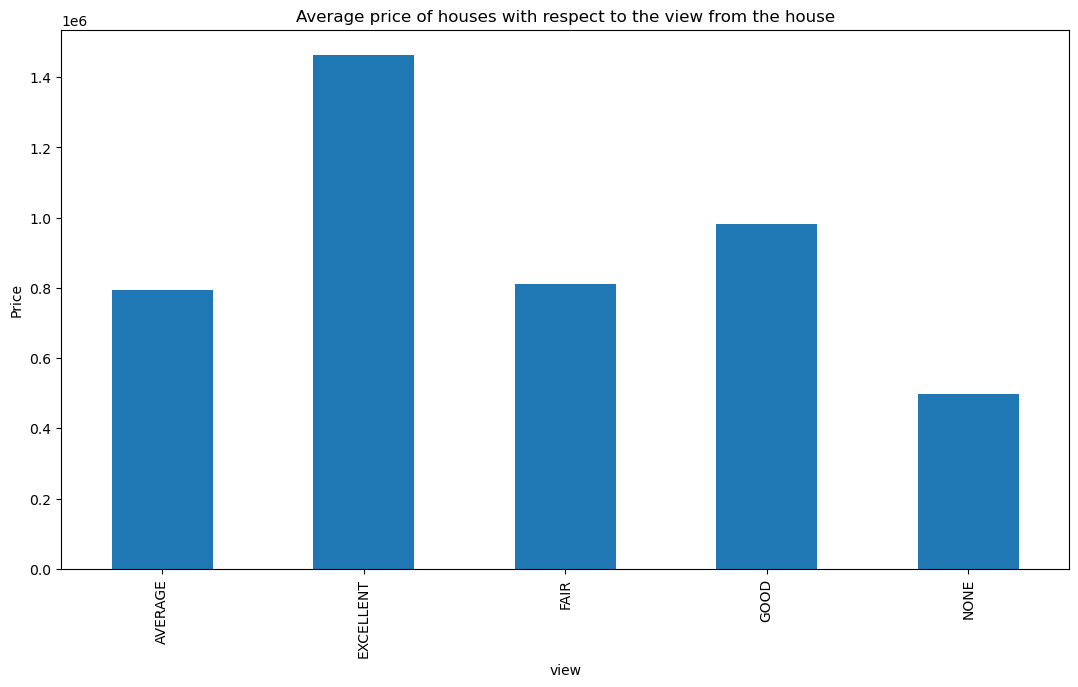

In [89]:
# group by view and plot average price for each view
fig = plt.figure(figsize=(13,7))
data.groupby("view")['price'].mean().plot.bar(y="price", fig=fig)
plt.title('Average price of houses with respect to the view from the house')
plt.ylabel('Price')

The bar graph above helps to identify the effect that a view has on the price of a house. It is evident that houses with excellent views have the highest price average while houses without a view have the lowest price average. 

Text(0, 0.5, 'Price')

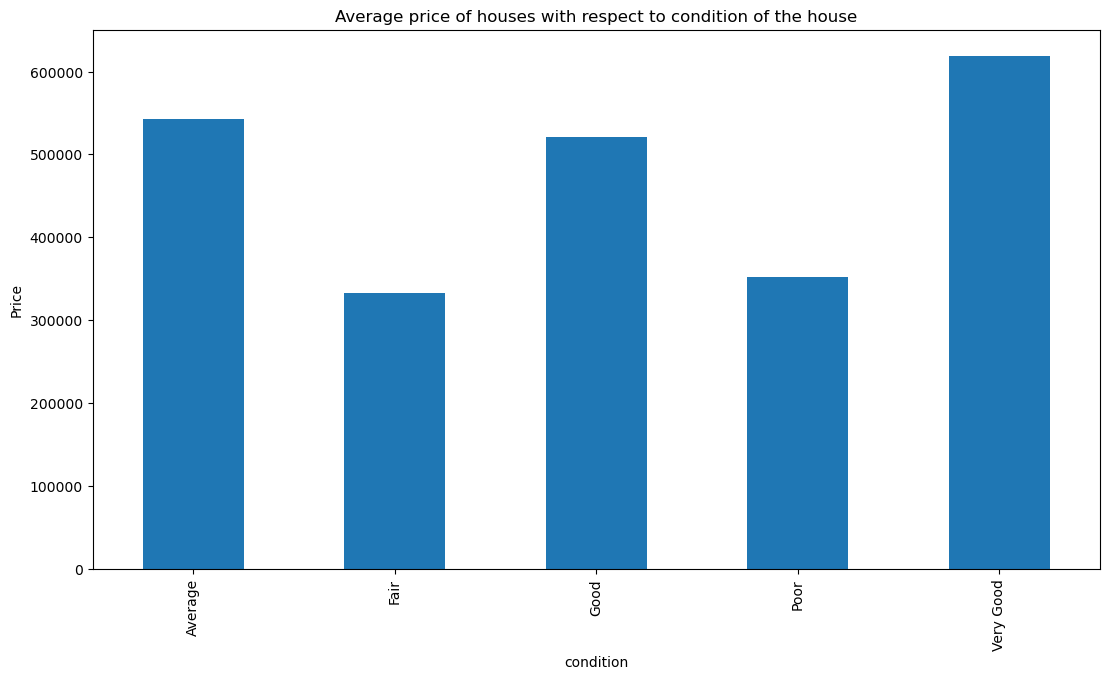

In [90]:
# group by condition and plot average price for each condition
fig = plt.figure(figsize=(13,7))
data.groupby("condition")['price'].mean().plot.bar(y="price", fig=fig)
plt.title('Average price of houses with respect to condition of the house')
plt.ylabel('Price')

From the graph plotted above, It is fair to conclude that houses that are in very good condition have the highest price average. The unexpected finding here is that houses that are in poor to fair condition almost have the same price average with poor conditioned houses averaging more money than fair conditioned houses.  

Text(0, 0.5, 'Price')

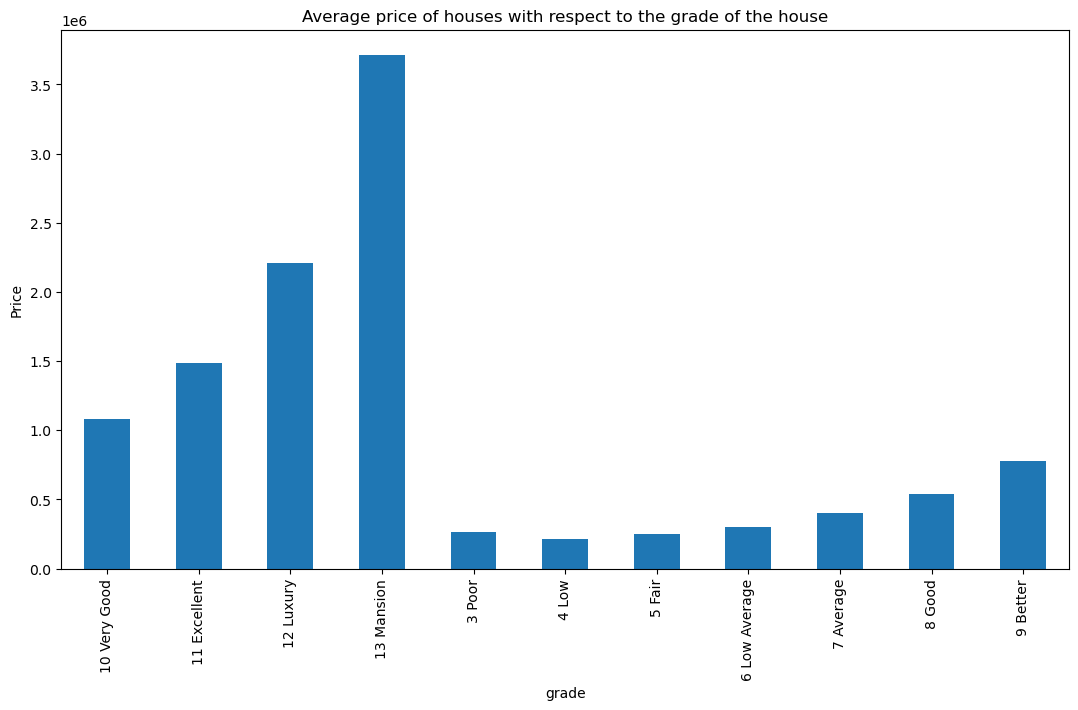

In [91]:
# group by grade and plot average price for each grade
fig = plt.figure(figsize=(13,7))
data.groupby("grade")['price'].mean().plot.bar(y="price", fig=fig)
plt.title('Average price of houses with respect to the grade of the house')
plt.ylabel('Price')

From the graph above, I can infer that mansions are the highest priced houses followed by luxurious houses. Houses of poor, low and fair grades have the lowest price averages as is to be expected.

#### f) Modelling.
In order to create a regression model, I need to use columns with numerical data types. The numerical columns will be copied into a new variable that will be used to create the regression model.

In [92]:
# check the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19162 entries, 1 to 21596
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           19162 non-null  int64  
 1   price        19162 non-null  float64
 2   bedrooms     19162 non-null  int64  
 3   bathrooms    19162 non-null  float64
 4   sqft_living  19162 non-null  int64  
 5   sqft_lot     19162 non-null  int64  
 6   floors       19162 non-null  float64
 7   waterfront   19162 non-null  object 
 8   view         19162 non-null  object 
 9   condition    19162 non-null  object 
 10  grade        19162 non-null  object 
 11  yr_built     19162 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 1.9+ MB


In [93]:
# create a new variable with numerical columns only and find there correlation with the price
model_data = data[['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','yr_built']].copy()
model_data.corr()['price']

price          1.000000
bedrooms       0.309063
bathrooms      0.526612
sqft_living    0.704429
sqft_lot       0.087432
floors         0.258801
yr_built       0.053428
Name: price, dtype: float64

Correlation is a measure related to regression modelling and we can see that these variables have medium-to-strong correlation with the price. Since sqft_living has the strongest correlation with the price, I will use it to create a simple regression model that will be evaluated against the multiple regression model.

> __i) Simple model__

In [94]:
# create a simple regression model
sim_formula = 'price ~ sqft_living'
sim_model = ols(sim_formula, model_data).fit()
sim_model_summary = sim_model.summary()
print(sim_model_summary)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                 1.887e+04
Date:                Sat, 08 Jul 2023   Prob (F-statistic):               0.00
Time:                        01:40:27   Log-Likelihood:            -2.6635e+05
No. Observations:               19162   AIC:                         5.327e+05
Df Residuals:                   19160   BIC:                         5.327e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.861e+04   4697.391    -10.348      

> __Interpreting the simple model__<br>

The formula set-up is:<br>
   > price = 283.40(square-feet) - 48607.47<br>
    
* The model is statistically significant overall, with the f-statistic p-value well below 0.05.
* The model explains about 50% of the variance in price.
* The model coefficient (const and sqft_living) are both statistically significant, with t-statistic p-values well below 0.05.
* Given that a house has 0 square-feet of living area, the price of the house drops by 48,607 dollars.
* For each increase in 1 square-foot of of the living area, we see an associated increase of 283.40 dollars in the price of the house.  

Text(0.5, 1.0, 'Price & sqft_living scatter plot with regression line')

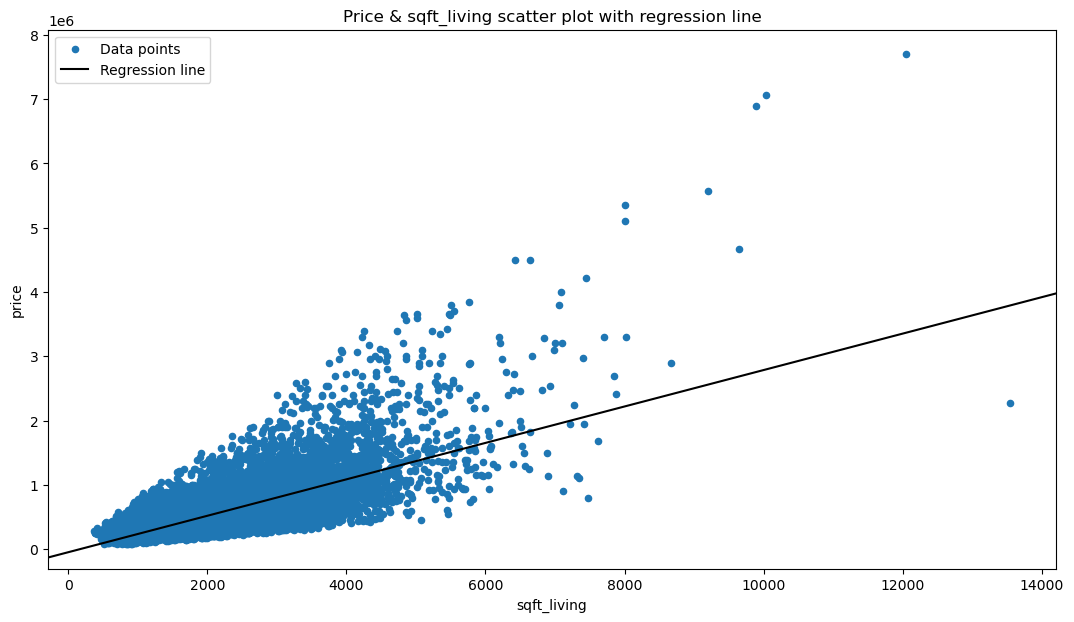

In [95]:
# visualizing the simple model
fig, ax = plt.subplots(figsize=(13,7))
model_data.plot.scatter(x="sqft_living", y="price", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=sim_model, label="Regression line", ax=ax, color="black")
ax.legend()
plt.title('Price & sqft_living scatter plot with regression line')

#### ii) Multiple linaer regrssion model.
Now that I have a simple model that I will use to evaluate the final model, I can go on and create a multiple linear regression model that includes all of the numerical datasets. 

#### One-Hot encoding categorical variables.
This step of the modelling process involves creating dummy variables from categorical datasets, i.e bedrooms. Once the dummy variables have been created, I will drop one of the dummy variables so as to avoid the __dummy variable trap.__ The dropped variable is then considered to be the refrence category.  

In [96]:
# creating dummy variables from the bedrooms and floors columns
dummy_model_data = pd.get_dummies(model_data, columns=['bedrooms'])
dummy_model_data

,price,bathrooms,sqft_living,sqft_lot,floors,yr_built,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bedrooms_11,bedrooms_33
1,538000.0,2.25,2570,7242,2.0,1951,False,False,True,False,False,False,False,False,False,False,False,False
2,180000.0,1.00,770,10000,1.0,1933,False,True,False,False,False,False,False,False,False,False,False,False
3,604000.0,3.00,1960,5000,1.0,1965,False,False,False,True,False,False,False,False,False,False,False,False
4,510000.0,2.00,1680,8080,1.0,1987,False,False,True,False,False,False,False,False,False,False,False,False
5,1230000.0,4.50,5420,101930,1.0,2001,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,475000.0,2.50,1310,1294,2.0,2008,False,False,True,False,False,False,False,False,False,False,False,False
21592,360000.0,2.50,1530,1131,3.0,2009,False,False,True,False,False,False,False,False,False,False,False,False
21593,400000.0,2.50,2310,5813,2.0,2014,False,False,False,True,False,False,False,False,False,False,False,False
21594,402101.0,0.75,1020,1350,2.0,2009,False,True,False,False,False,False,False,False,False,False,False,False


By creating the dummy variables, the number of columns increased from 7 to 18. This poses a new challenge because it has made it harder to create an interpretable model. The solution to this problem is to create a new category known as other in both categorical datasets.

In [97]:
# create other category for bedroom categories with less than 1000 houses
bedrooms_to_replace = model_data["bedrooms"].value_counts()[model_data["bedrooms"].value_counts() < 1000].index.values
model_data['bedrooms'].replace(bedrooms_to_replace, value="other", inplace=True)

In [98]:
# create a refined dummy model dataset
ref_dummy_model_data = pd.get_dummies(model_data, columns=['bedrooms'])
ref_dummy_model_data

,price,bathrooms,sqft_living,sqft_lot,floors,yr_built,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_other
1,538000.0,2.25,2570,7242,2.0,1951,False,True,False,False,False
2,180000.0,1.00,770,10000,1.0,1933,True,False,False,False,False
3,604000.0,3.00,1960,5000,1.0,1965,False,False,True,False,False
4,510000.0,2.00,1680,8080,1.0,1987,False,True,False,False,False
5,1230000.0,4.50,5420,101930,1.0,2001,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
21591,475000.0,2.50,1310,1294,2.0,2008,False,True,False,False,False
21592,360000.0,2.50,1530,1131,3.0,2009,False,True,False,False,False
21593,400000.0,2.50,2310,5813,2.0,2014,False,False,True,False,False
21594,402101.0,0.75,1020,1350,2.0,2009,True,False,False,False,False


In [99]:
# drop one column from each side of dummy variables to be used as the  reference category 
ref_dummy_model_data = ref_dummy_model_data.drop(['bedrooms_other'], axis=1)
ref_dummy_model_data

,price,bathrooms,sqft_living,sqft_lot,floors,yr_built,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5
1,538000.0,2.25,2570,7242,2.0,1951,False,True,False,False
2,180000.0,1.00,770,10000,1.0,1933,True,False,False,False
3,604000.0,3.00,1960,5000,1.0,1965,False,False,True,False
4,510000.0,2.00,1680,8080,1.0,1987,False,True,False,False
5,1230000.0,4.50,5420,101930,1.0,2001,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
21591,475000.0,2.50,1310,1294,2.0,2008,False,True,False,False
21592,360000.0,2.50,1530,1131,3.0,2009,False,True,False,False
21593,400000.0,2.50,2310,5813,2.0,2014,False,False,True,False
21594,402101.0,0.75,1020,1350,2.0,2009,True,False,False,False


In [100]:
# create a multiple linear regression model
multi_formula = 'price ~ bathrooms + sqft_living + sqft_lot +floors + yr_built + bedrooms_2 + bedrooms_3 + bedrooms_4 + bedrooms_5'
multi_model = ols(multi_formula, ref_dummy_model_data).fit()
multi_model_summary = multi_model.summary()
print(multi_model_summary)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     2699.
Date:                Sat, 08 Jul 2023   Prob (F-statistic):               0.00
Time:                        01:40:49   Log-Likelihood:            -2.6507e+05
No. Observations:               19162   AIC:                         5.302e+05
Df Residuals:                   19152   BIC:                         5.302e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           6.073e+06   1.44

#### Interpreting the multiple regression model.
    
* The model is overally statistically significant, with the f-statistic p-value well below 0.05.
* The model explains about 56% of the variance in price. Which is an improvement from the simple model.
* Not all the model coefficients are statistically significant. Two coeficients (bedrooms_4 and bedroom_5) are both not statistically significant, with t-statistic p-values well above 0.05.
* Given that all other predictors are 0, the price of the house is 6,072,946 dollars. Which is obviously not a real world value considering that a house should atleast have one of the other factors available.
* The refrence category for the number of bedrooms is any other number of bedrooms aside from the ones used in the model.
    * When a house has 2 bedrooms as compared to any other number of bedrooms besides 2, 3, 4 and 5, we see an associated increase of 191,849.5 dollars in the price of the house.
    * when a house has 3 bedrooms as compared to any other number of bedrooms besides 2, 3, 4 and 5, we see an associated increase of 93,730.56 dollars in the price of the house.
* For each increase in 1 bathroom, we see an associated increase of 61,256.36 dollars in the price of the house.
* For each increase in 1 square-foot of the living area, we see an associated increase of 305.33 dollars in the price of the house.
* For each increase in 1 square-foot of the lot area, we see an associated decrease of 0.31 dollars in the price of the house.
* for each increase of 1 floor, we see an associated increase of 55,786.64 dollars in the price of the house.
* for each year newer the house is, we see an associated decrease of 3,270.37 dollars in the price of the house.